### Loading the Data Set

In [1]:
import pandas as pd
df = pd.read_csv("Bank_Churn.csv")
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,$-,1,1,1,"$101,348.88",1
1,15647311,Hill,608,Spain,Female,41,1,"$83,807.86",1,0,1,"$112,542.58",0
2,15619304,Onio,502,France,Female,42,8,"$159,660.80",3,1,0,"$113,931.57",1
3,15701354,Boni,699,France,Female,39,1,$-,2,0,0,"$93,826.63",0
4,15737888,Mitchell,850,Spain,Female,43,2,"$125,510.82",1,1,1,"$79,084.10",0
5,15574012,Chu,645,Spain,Male,44,8,"$113,755.78",2,1,0,"$149,756.71",1
6,15592531,Bartlett,822,France,Male,50,7,$-,2,1,1,"$10,062.80",0
7,15656148,Obinna,376,Germany,Female,29,4,"$115,046.74",4,1,0,"$119,346.88",1
8,15792365,He,501,France,Male,44,4,"$142,051.07",2,0,1,"$74,940.50",0
9,15592389,H?,684,France,Male,27,2,"$134,603.88",1,1,1,"$71,725.73",0


### Checking the Shape of the Dataset.

In [2]:
print("Shape of dataset:", df.shape)

Shape of dataset: (10000, 13)


### Checking for Missing or NA values

In [3]:
print("Missing Values:", df.isnull().sum())

Missing Values: CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
 EstimatedSalary     0
Exited               0
dtype: int64


### Checking the Data Types

In [4]:
print("Data Types:", df.dtypes)

Data Types: CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance              object
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
 EstimatedSalary     object
Exited                int64
dtype: object


### Checking for Duplicates

In [5]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [6]:
print("\nSummary Stats:\n", df.describe(include='all'))



Summary Stats:
           CustomerId Surname   CreditScore Geography Gender           Age  \
count   1.000000e+04   10000  10000.000000     10000  10000  10000.000000   
unique           NaN    2932           NaN         3      2           NaN   
top              NaN   Smith           NaN    France   Male           NaN   
freq             NaN      32           NaN      5014   5457           NaN   
mean    1.569094e+07     NaN    650.528800       NaN    NaN     38.921800   
std     7.193619e+04     NaN     96.653299       NaN    NaN     10.487806   
min     1.556570e+07     NaN    350.000000       NaN    NaN     18.000000   
25%     1.562853e+07     NaN    584.000000       NaN    NaN     32.000000   
50%     1.569074e+07     NaN    652.000000       NaN    NaN     37.000000   
75%     1.575323e+07     NaN    718.000000       NaN    NaN     44.000000   
max     1.581569e+07     NaN    850.000000       NaN    NaN     92.000000   

              Tenure Balance  NumOfProducts    HasCrCard  

In [7]:
# There is a Nan or $- lurking in a table column balance with some extra spaaces.
# Replacing that value with a 0.0 float number and make data consistent.
df['Balance'] = df['Balance'].str.replace(r'[\$,]', '', regex=True).str.strip()

# Step 2: Replace '-' or empty strings with 0
df['Balance'] = df['Balance'].replace({'-': '0', '': '0'})
# Know Changing the Type of Balance column
df['Balance'] = df['Balance'].astype(float)

In [8]:
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"$101,348.88",1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,"$112,542.58",0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,"$113,931.57",1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"$93,826.63",0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,"$79,084.10",0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,"$149,756.71",1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,"$10,062.80",0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,"$119,346.88",1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,"$74,940.50",0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,"$71,725.73",0


In [9]:
df.columns = df.columns.str.strip()

In [10]:
df['EstimatedSalary'] = df['EstimatedSalary'].str.replace(r'[\$,]', '', regex=True).str.strip()
df['EstimatedSalary'] = df['EstimatedSalary'].astype(float)


In [11]:
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Changed the Data Types of Balance and Estimated Salary

In [12]:
print("Data Types:",df.dtypes)

Data Types: CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


#### Again checking for Nulls after Changing the Data Types

In [13]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


# Done with the Following Things
### 1 Null Values
### 2 Duplicates
### 3 Inconsistent Formmat
### 4 Trimed Column names as needed
### 5 Replaced some Values
### 6 Changed Data Types

# Know Diving Deep into the Data To Explore Trends with Exporatory Data Analysis and Statistical Analysis

#### Doing some Quick Stats

In [15]:
df.describe(include='all') # We can use include attribute to include all columns in the summary stats else the describe will only show the numeric columns.

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


## Going to Find Outliers in the Numerical Columns

In [16]:
from scipy.stats import iqr # iqr is inter quartile range that helps to find the outliers in the data.

In [17]:
columns_to_check = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Detect outliers using IQR
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR_value = iqr(df[col])  # or IQR_value = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR_value
    upper_bound = Q3 + 1.5 * IQR_value
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"📌 Column: {col}")
    print(f"IQR: {IQR_value:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Total Outliers: {outliers.shape[0]}")
    print("-" * 40)

📌 Column: CreditScore
IQR: 134.00
Lower Bound: 383.00, Upper Bound: 919.00
Total Outliers: 15
----------------------------------------
📌 Column: Age
IQR: 12.00
Lower Bound: 14.00, Upper Bound: 62.00
Total Outliers: 359
----------------------------------------
📌 Column: Tenure
IQR: 4.00
Lower Bound: -3.00, Upper Bound: 13.00
Total Outliers: 0
----------------------------------------
📌 Column: Balance
IQR: 127644.24
Lower Bound: -191466.36, Upper Bound: 319110.60
Total Outliers: 0
----------------------------------------
📌 Column: NumOfProducts
IQR: 1.00
Lower Bound: -0.50, Upper Bound: 3.50
Total Outliers: 60
----------------------------------------
📌 Column: EstimatedSalary
IQR: 98386.14
Lower Bound: -96577.10, Upper Bound: 296967.45
Total Outliers: 0
----------------------------------------


#### We are not going to drop these outliers or alter them because they all are important for key information.

### Creating an Age Segment Variable in data for effective Visualizations.

In [ ]:
def segment_age(age):
    if age <= 25:
        return 'Young (<=25)'
    elif 26 <= age <= 35:
        return 'Adult (26-35)'
    elif 36 <= age <= 45:
        return 'Mature (36-45)'
    elif 46 <= age <= 60:
        return 'Senior (46-60)'
    else:
        return 'Elderly (60+)'

# Apply the function to create a new column
df['Age Segment'] = df['Age'].apply(segment_age)
print("Data Types:",df['Age Segment'].dtypes)
print(df[['Age', 'Age Segment']].head(10))


Data Types: object
   Age     Age Segment
0   42  Mature (36-45)
1   41  Mature (36-45)
2   42  Mature (36-45)
3   39  Mature (36-45)
4   43  Mature (36-45)
5   44  Mature (36-45)
6   50  Senior (46-60)
7   29   Adult (26-35)
8   44  Mature (36-45)
9   27   Adult (26-35)


## Moving toward some cool stuff to see patterns in data.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

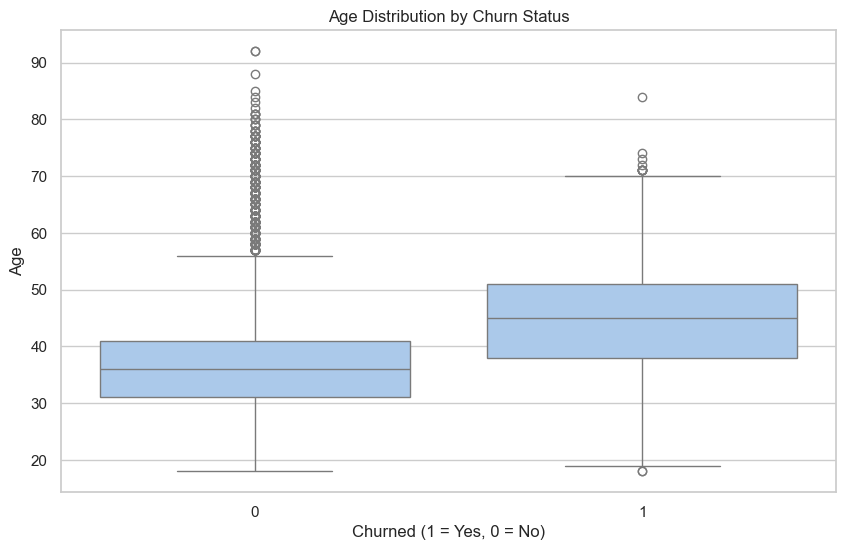

In [23]:
# Set aesthetic
sns.set(style="whitegrid", palette="pastel")

# Plot example: Age vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churned (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()

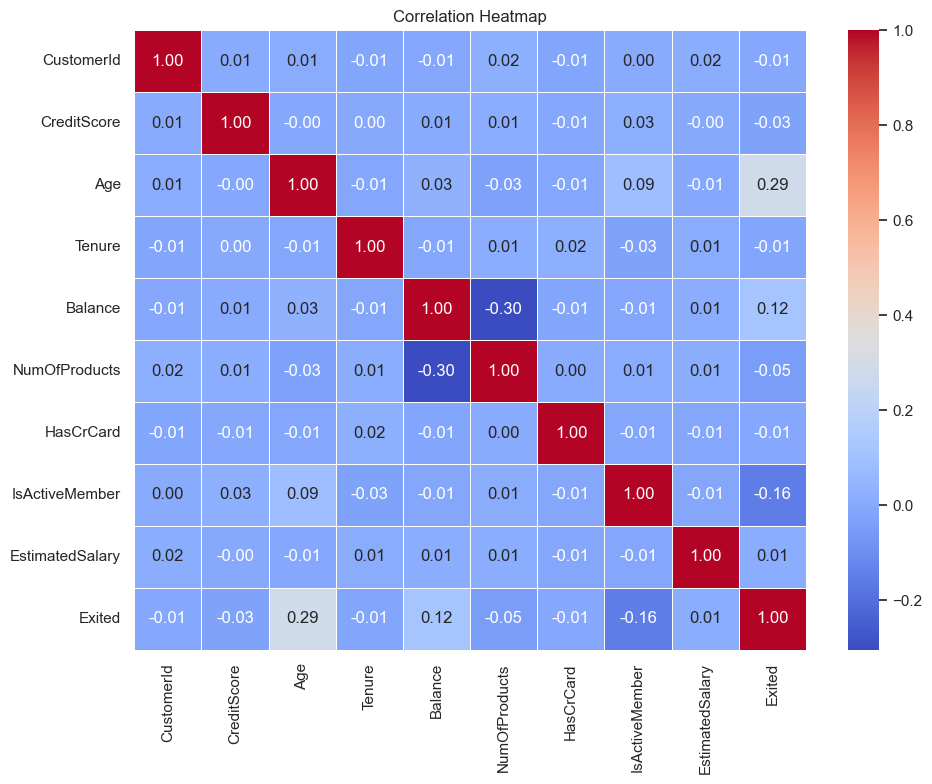

In [24]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Saving the data

In [25]:

df.to_csv('Churn_Cleaned.csv', index=False)


#                                                       Thank You!